<a href="https://colab.research.google.com/github/abinetha/Datasets/blob/main/TaxiFareAbineth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1  

unique_id               0
amount                 

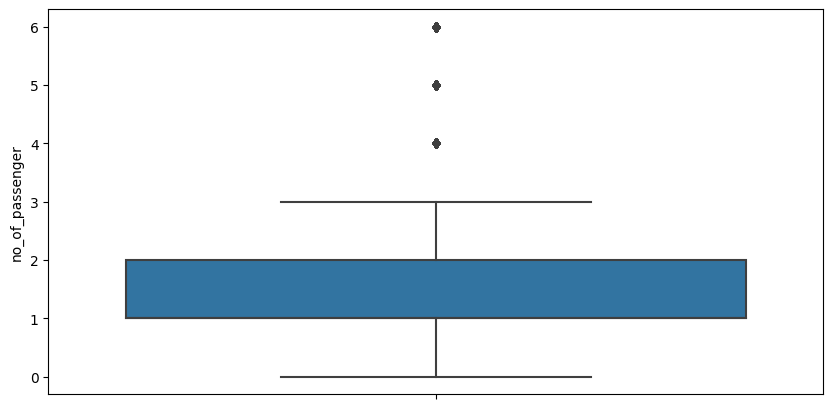

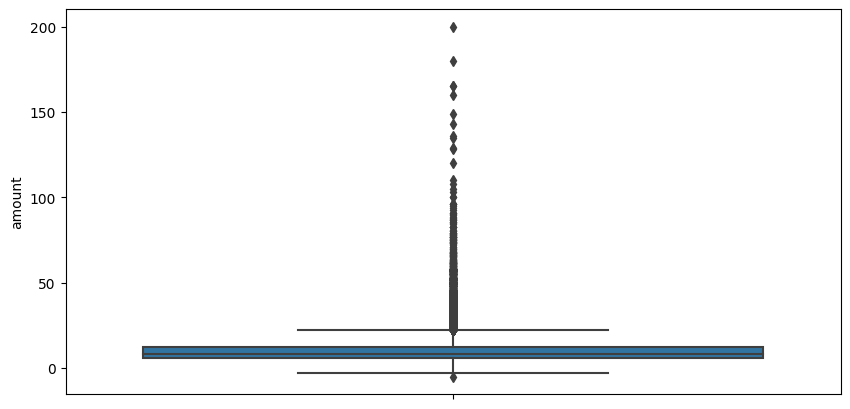


  unique_id  amount  no_of_passenger  day_0  day_1  day_2  day_3  day_4  \
0   26:21.0     4.5              1.0      1      0      0      0      0   
1   52:16.0    16.9              1.0      0      1      0      0      0   
2   35:00.0     5.7              2.0      0      0      0      1      0   
3   30:42.0     7.7              1.0      0      0      0      0      0   
4   51:00.0     5.3              1.0      0      1      0      0      0   

   day_5  day_6  month_1  month_2  month_3  month_4  month_5  month_6  \
0      0      0        0        0        0        0        0        1   
1      0      0        1        0        0        0        0        0   
2      0      0        0        0        0        0        0        0   
3      1      0        0        0        0        1        0        0   
4      0      0        0        0        1        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  Hour_0  Hour_1  \
0        0        0        0   

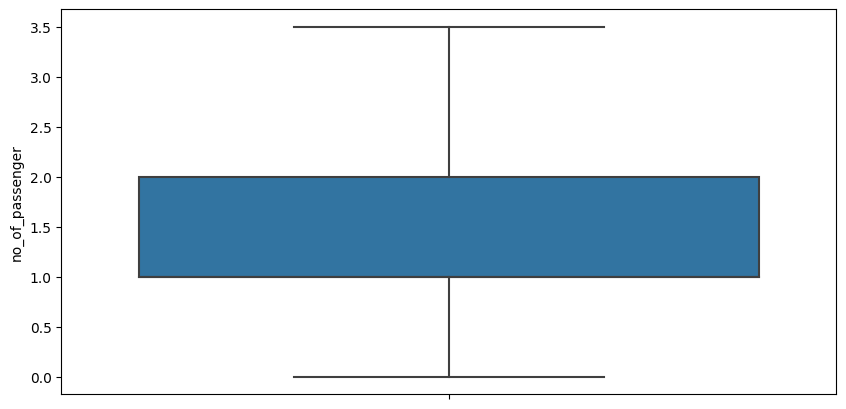

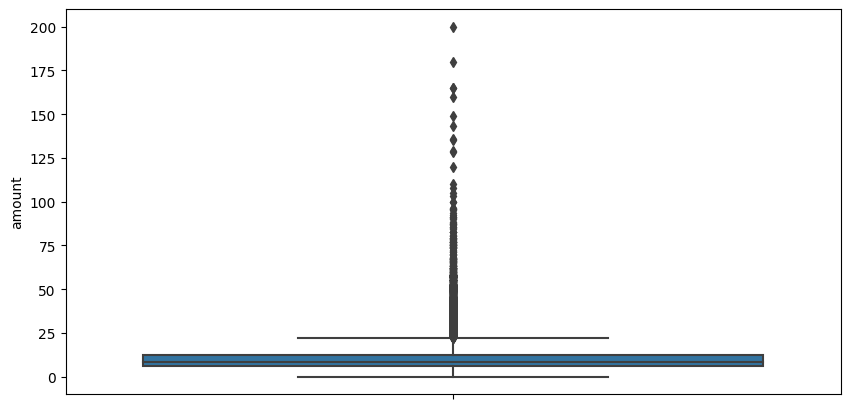


  unique_id  amount  no_of_passenger  day_0  day_1  day_2  day_3  day_4  \
0   26:21.0     4.5                1      1      0      0      0      0   
1   52:16.0    16.9                1      0      1      0      0      0   
2   35:00.0     5.7                2      0      0      0      1      0   
3   30:42.0     7.7                1      0      0      0      0      0   
4   51:00.0     5.3                1      0      1      0      0      0   

   day_5  day_6  month_1  month_2  month_3  month_4  month_5  month_6  \
0      0      0        0        0        0        0        0        1   
1      0      0        1        0        0        0        0        0   
2      0      0        0        0        0        0        0        0   
3      1      0        0        0        0        1        0        0   
4      0      0        0        0        1        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  Hour_0  Hour_1  \
0        0        0        0   

In [12]:
#### Capstone Taxi Fare Project ####

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

traindf = pd.read_csv('https://raw.githubusercontent.com/abinetha/Datasets/main/TaxiFare.csv')
print(traindf.head())
print()
print(traindf.isnull().sum())
print()
print(traindf.describe())
print()
traindf['date_time_of_pickup'] = pd.to_datetime(traindf['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S UTC')

traindf['Hour'] = traindf['date_time_of_pickup'].dt.hour
traindf['minute'] = traindf['date_time_of_pickup'].dt.minute
traindf['date'] = traindf['date_time_of_pickup'].dt.day
traindf['day'] = traindf['date_time_of_pickup'].dt.dayofweek
traindf['month'] = traindf['date_time_of_pickup'].dt.month
traindf['year'] = traindf['date_time_of_pickup'].dt.year
print(traindf.head())
print()
### One hot encoding
traindf = pd.get_dummies(traindf, columns=['day','month','Hour','minute','date','year'],dtype=int)

traindf.drop(traindf[traindf['date_time_of_pickup'].isnull()].index, inplace=True)
traindf.drop('date_time_of_pickup', axis=1, inplace=True)

plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['no_of_passenger'])
plt.show()
print()
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['amount'])
plt.show()
print()
# Remove outlier
def remove_outlier(col):
    sorted(col)
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_range = q1 - 1.5 * iqr
    upper_range = q3 + 1.5 * iqr
    return lower_range, upper_range

# 1. Remove no_of_passenger less than zero and with more than 7
traindf['no_of_passenger'].sort_values(ascending=True).head(10)

traindf.drop(traindf[traindf['no_of_passenger'] > 7 ].index, inplace = True)
traindf.drop(traindf[traindf['no_of_passenger'] < 0 ].index, inplace = True)
traindf.drop(traindf[traindf['no_of_passenger'].isnull() ].index, inplace = True)

lowpass,uppass = remove_outlier(traindf['no_of_passenger'])
traindf['no_of_passenger'] = np.where(traindf['no_of_passenger'] > uppass, uppass, traindf['no_of_passenger'])
traindf['no_of_passenger'] = np.where(traindf['no_of_passenger'] < lowpass, lowpass, traindf['no_of_passenger'])

# 2. Remove amount less than zero and should be less than 454
traindf.drop(traindf[traindf['amount'] > 455 ].index, inplace = True)
traindf.drop(traindf[traindf['amount'] < 0 ].index, inplace = True)
traindf.drop(traindf[traindf['amount'].isnull() ].index, inplace = True)

# 3. Pickup and dropoff latitude should be (-90 to 90 )
traindf.drop(traindf[traindf['latitude_of_pickup'] > 90].index, inplace=True)
traindf.drop(traindf[traindf['latitude_of_pickup'] < -90].index, inplace=True)
traindf.drop(traindf[traindf['latitude_of_dropoff'] > 90].index, inplace=True)
traindf.drop(traindf[traindf['latitude_of_dropoff'] < -90].index, inplace=True)


# 4. Pickup and dropoff longtitude should be ( -180 to 180 )
traindf.drop(traindf[traindf['longitude_of_dropoff'] > 180].index, inplace=True)
traindf.drop(traindf[traindf['longitude_of_dropoff'] < -180].index, inplace=True)
traindf.drop(traindf[traindf['longitude_of_pickup'] > 180].index, inplace=True)
traindf.drop(traindf[traindf['longitude_of_pickup'] < -180].index, inplace=True)

# Calculate distance using Haversion formulas
from math import *

def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]

    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

traindf['distance'] = traindf[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']].apply(haversine,axis=1)
traindf.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'], axis=1, inplace=True)

print(traindf.head())
print()

# Distance should be positive and less than 130 Km.

print(traindf.isnull().sum())
print()

traindf.drop(traindf[traindf['distance'] > 130].index, inplace=True)
traindf.drop(traindf[traindf['distance'] < 0 ].index, inplace=True)

mean=traindf['distance'].mean()
print('Mean of distance column = ',mean)
print()
traindf['distance']=traindf['distance'].replace(0.0,mean)
print(traindf.isnull().sum())
print()

plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['no_of_passenger'])
plt.show()
print()
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['amount'])
plt.show()
print()
# sns.boxplot(y=traindf['distance'])
plt.show()


traindf['no_of_passenger'] = traindf['no_of_passenger'].astype('int64')
print(traindf.head())
print()
# Dropping Unwanted Columns

traindf=traindf.drop(['unique_id'],axis=1)

print(traindf.columns)
print()
X_train, X_test, y_train, y_test = train_test_split(traindf.drop('amount', axis=1),
                                                   traindf['amount'], test_size=0.3, random_state = 1)

print(traindf.info())
print()
#### Apply Linear Regression model
model2=LinearRegression()
model2.fit(X_train,y_train)
print('Linear Regression Scores :')

print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))
print()

print('DecisionTreeRegressor Scores :')
model4=DecisionTreeRegressor(max_depth=6)
model4.fit(X_train,y_train)
print(model4.score(X_train,y_train))
print(model4.score(X_test,y_test))

from sklearn.ensemble import BaggingRegressor
print()

print('BaggingRegressor Scores :')
model5=BaggingRegressor(n_estimators=2,base_estimator=model4)
model5.fit(X_train,y_train)
print(model5.score(X_train,y_train))
print(model5.score(X_test,y_test))

from sklearn.ensemble import AdaBoostRegressor
print()

print('AdaBoostRegressor Scores :')
model6=AdaBoostRegressor(n_estimators=2,base_estimator=model5)
model6.fit(X_train,y_train)
print(model6.score(X_train,y_train))
print(model6.score(X_test,y_test))

from sklearn.ensemble import GradientBoostingRegressor
print()

print('GradientBoostingRegressor Scores :')
model7=GradientBoostingRegressor(max_depth=4,n_estimators=100)
model7.fit(X_train,y_train)
print(model7.score(X_train,y_train))
print(model7.score(X_test,y_test))

from sklearn.ensemble import RandomForestRegressor
print()

print('RandomForestRegressor Scores :')
model8=RandomForestRegressor(max_depth=8,n_estimators=50)
model8.fit(X_train,y_train)
print(model8.score(X_train,y_train))
print(model8.score(X_test,y_test))
